# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

## Exercícios de Fixação - Aulas: Parte 1 até Parte 5

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

# Bibliotecas necessárias para execução dos exercícios

Nós usamos bibliotecas que geralmente estão disponíveis por padrão no ambiente Python-Anaconda e também no Google Colab. Caso receba mensagem de erro ao importar alguma das bibliotecas, então será necessário instalar o respectivo pacote no seu ambiente. Nesse caso, envie uma mensagem no fórum da disciplina para receber ajuda. 

In [ ]:
# importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
import scipy
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

# Arquivo CSV (dados) para os Exercícios de Fixação

Utilizar os dados do arquivo **bank_marketing_exercicio.csv** para realização dos exercícios de fixação.

Para executar o código abaixo, certifique-se de que o arquivo bank_marketing_exercicio.csv esteja no mesmo diretório desse script.

In [ ]:
import pandas as pd

df_dados = pd.read_csv('bank_marketing_exercicio.csv')
df_dados

,age,balance,duration
0,37,4760,182
1,30,-393,435
2,32,2979,156
3,30,1185,284
4,42,221,720
...,...,...,...
395,47,477,973
396,40,4795,57
397,42,216,144
398,36,2880,283


# Exercício 1

Utilize a distância euclidiana para recuperar e listar os 10 objetos mais próximos ao primeiro objeto da base.

Observação: o primeiro objeto será retornado como vizinho dele mesmo (distância=0), ou seja, ele também estará presente na lista dos 10 objetos mais próximos.


In [ ]:
nbrs = NearestNeighbors(metric='euclidean',n_neighbors=10).fit(df_dados)

# recuperando features do primeiro objeto da base
objeto_id = 0
objeto = df_dados.loc[objeto_id].to_list()

distances, indices = nbrs.kneighbors([objeto])
resultado = df_dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,age,balance,duration,distance
0,37,4760,182,0.000000
338,37,4760,187,5.000000
370,32,4761,159,23.558438
394,37,4798,156,46.043458
390,33,4789,220,47.968740
275,33,4790,137,54.230987
6,79,4738,151,56.648036
156,41,4824,168,65.635356
323,55,4809,223,66.377707
201,30,4787,99,87.561407


# Exercício 2

Utilize a distância de Minkowski correspondente à distância de Manhattan para recuperar e listar os 10 objetos mais próximos ao primeiro objeto da base.

Observação: o primeiro objeto será retornado como vizinho dele mesmo (distância=0), ou seja, ele também estará presente na lista dos 10 objetos mais próximos.

In [ ]:
nbrs = NearestNeighbors(metric='minkowski',n_neighbors=10, p=1).fit(df_dados)


# recuperando features do primeiro objeto da base
objeto_id = 0
objeto = df_dados.loc[objeto_id].to_list()
print('Atributos')

distances, indices = nbrs.kneighbors([objeto])
resultado = df_dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

Atributos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,age,balance,duration,distance
0,37,4760,182,0.0
338,37,4760,187,5.0
370,32,4761,159,29.0
394,37,4798,156,64.0
390,33,4789,220,71.0
275,33,4790,137,79.0
156,41,4824,168,82.0
6,79,4738,151,95.0
323,55,4809,223,108.0
201,30,4787,99,117.0


# Exercício 3

Faça o agrupamento hierárquico da base de clientes de marketing utilizando Single-Link e distância euclidiana. Plote o dendrograma. Avalie o dendrograma por meio do índice de Correlação Cofenética.

Observação: use o pdist() para calcular a matriz de distâncias.

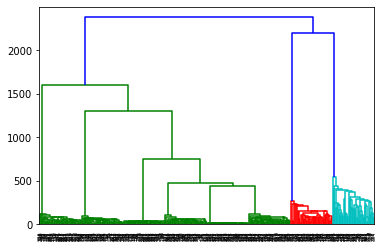

In [ ]:
M = pdist(df_dados,metric='euclidean') # calcula matriz de dissimilaridade com distância euclidiana
Z_single_link = hierarchy.linkage(M, 'single') # agrupamento com single-link
dendrogram_single_link = hierarchy.dendrogram(Z_single_link) # plotando dendrograma

In [ ]:
# analisando o dendrograma via correlação cofenética
result = scipy.cluster.hierarchy.cophenet(Z_single_link,M)
print('Correlacao cofenetica (Single-Link) = ',result[0])

Correlacao cofenetica (Single-Link) =  0.81875177674553


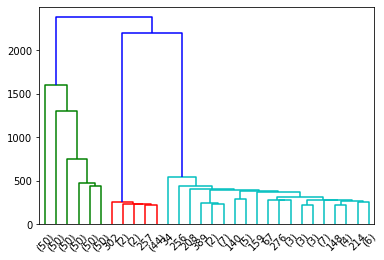

In [ ]:
# dica (opcional): para melhorar a visualização do dendrograma, pode usar o modo truncate
dendrogram = hierarchy.dendrogram(Z_single_link,truncate_mode='lastp') # plotando dendrograma

# Exercício 4

Faça o agrupamento hierárquico da base de clientes de marketing utilizando Average-Link e distância euclidiana. Plote o dendrograma. Avalie o dendrograma por meio do índice de Correlação Cofenética.

Observação: use o pdist() para calcular a matriz de distâncias.

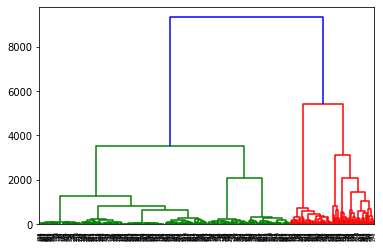

In [ ]:
# obs: aqui na seria necessário recalcular a matriz de dissimilaridades M. Poderia aproveitar a mesma do exercício anterior.
M = pdist(df_dados,metric='euclidean') # calcula matriz de dissimilaridade com distância euclidiana

Z_average_link = hierarchy.linkage(M, 'average') # agrupamento com average-link
dendrogram_average_link = hierarchy.dendrogram(Z_average_link) # plotando dendrograma

In [ ]:
# analisando o dendrograma via correlação cofenética
result = scipy.cluster.hierarchy.cophenet(Z_average_link,M)
print('Correlacao cofenetica (Average Link) = ',result[0])

Correlacao cofenetica (Average Link) =  0.8544630737725877


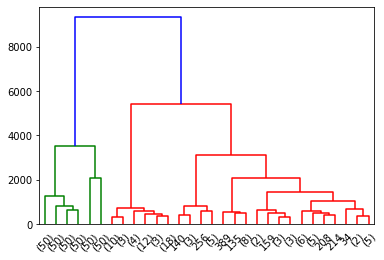

In [ ]:
# dica (opcional): para melhorar a visualização do dendrograma, pode usar o modo truncate
dendrogram_average_link = hierarchy.dendrogram(Z_average_link,truncate_mode='lastp') # plotando dendrograma

# Exercício 5

Escolha o agrupamento/dendrograma com maior correlação cofenética (proveniente do exercício 3 e 4). Utilize a medida de silhueta do agrupamento para identificar um número apropriado de clusters entre 3 e 10 (melhor partição via corte no dendrograma).

k= 3 Silhueta= 0.6513281778671453
k= 4 Silhueta= 0.7159252903584553
k= 5 Silhueta= 0.7027635750067796
k= 6 Silhueta= 0.696465950326659
k= 7 Silhueta= 0.7135774279805044
k= 8 Silhueta= 0.7130649821033721
k= 9 Silhueta= 0.7036377732644883
k= 10 Silhueta= 0.7083201653882838

[Melhor partição] Silhueta retornou valor de  0.7159252903584553 para k = 4 



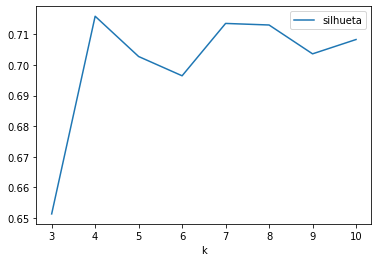

In [ ]:
L = [] # lista para armazenar silhueta de cada k

best_particao_hc = None
best_silhueta = -1
best_k = -1

for k in range(3,11): # variando de 3 até 10
  
  # cortando o dendrograma para obter k clusters
  particao = hierarchy.cut_tree(Z_average_link,n_clusters=k)
  particao = particao.T[0] # transformando a estrutura em uma particao

  # avaliando a partição com silhueta
  silhouette_avg = silhouette_score(df_dados, particao)

  print('k=',k,'Silhueta=',silhouette_avg)
  L.append((k,silhouette_avg))

  if silhouette_avg > best_silhueta:
    best_silhueta = silhouette_avg
    best_particao_hc = particao
    best_k = k

# imprimindo o melhor num. de clusters
print('\n[Melhor partição] Silhueta retornou valor de ',best_silhueta,'para k =',best_k,'\n')


# plotando
df_average_link_silhueta = pd.DataFrame(L)
df_average_link_silhueta.columns = ['k','silhueta']
df_average_link_silhueta.plot(kind='line',x='k',y='silhueta')

# Exercício 6

Agrupe os objetos utilizando o algoritmo k-means com as seguintes configurações:

*   Número máximo de iterações igual a 300
*   Inicialização aleatória dos centroides
*   Número de vezes que o k-means será executado com diferentes inicializações de centroides igual a 10
*   Número de clusters igual a 5

No final, apresente os centroides.

Atenção: use random_state=42 para garantir que serão utilizadas as mesmas sementes aleatórias do exercício resolvido.

In [ ]:
kmeans = KMeans(n_clusters=5,n_init=10,init='random',max_iter=300,random_state=42)
kmeans.fit(df_dados)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[   40.325,   345.165,   355.43 ],
       [   42.94 ,  4883.86 ,   223.06 ],
       [   43.86 , 13541.84 ,   229.62 ],
       [   44.04 ,  2822.72 ,   238.84 ],
       [   43.54 ,  8144.24 ,   228.02 ]])

# Exercício 7

Apresente os 3 objetos mais próximos do centroide representante do cluster=0. Use a distância euclidiana.

In [ ]:
nbrs = NearestNeighbors(metric='euclidean',n_neighbors=3).fit(df_dados)

# usando as features do centroide 0
objeto = centroids[0]
print('Features do centroide 0: ',objeto, "\n\n")

distances, indices = nbrs.kneighbors([objeto])
resultado = df_dados.iloc[indices[0]]
resultado['distance'] = distances[0]

resultado

Features do centroide 0:  [ 40.325 345.165 355.43 ] 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,age,balance,duration,distance
127,52,230,198,195.405956
175,46,225,201,195.756118
325,40,219,204,197.100882


# Exercício 8

Use o índice de silhueta para identificar qual é a melhor partição entre as obtidas pelo Exercício 5 e Exercício 6.

In [ ]:
sil_ex5 = silhouette_score(df_dados, best_particao_hc)
sil_ex6 = silhouette_score(df_dados, kmeans.labels_)

print('Silhueta da partição obtida no Ex. 5:',sil_ex5)
print('Silhueta da partição obtida no Ex. 6:',sil_ex6)

Silhueta da partição obtida no Ex. 5: 0.7159252903584553
Silhueta da partição obtida no Ex. 6: 0.7302185343753516


# Exercício 9

Utilize os atributos "balance" (eixo x) e "duration" (eixo y) para plotar os objetos usando um scatter-plot. A cor dos pontos deve corresponder aos clusters obtidos pelo k-means do Exercício 6.



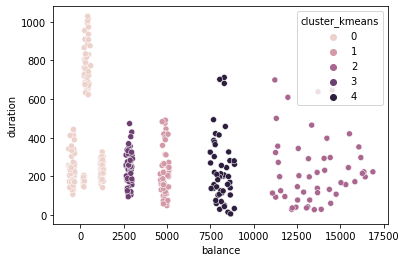

In [ ]:
df_dados['cluster_kmeans'] = kmeans.labels_
sns.scatterplot(data=df_dados, x='balance', y='duration', hue="cluster_kmeans")

# Exercício 10

Utilize os atributos "balance" (eixo x) e "duration" (eixo y) para plotar os objetos usando um scatter-plot. A cor dos pontos deve corresponder aos clusters obtidos pela melhor partição extraída do dendrograma (Exercício 5).

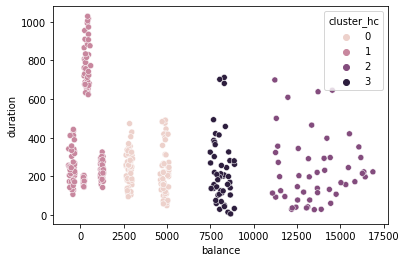

In [ ]:
df_dados['cluster_hc'] = best_particao_hc
sns.scatterplot(data=df_dados, x='balance', y='duration', hue="cluster_hc")